# PHYS 210 Mini-Project 01
### Ordinary Differential Equations - Projectile motion in 2D
Due Wed, Nov 2, 2022 - 9am

#### Before getting started

1. Read the Mini-Project 01 background handout on CoCalc in the folder `Pre-class_Readings/Project_01-background/`
1. Read the grading rubric document in the "Mini-project 01" module on Canvas

#### The problem

Consider a soccer ball kicked across level ground at an an initial angle $\theta$. It lands again some distance $d$ away from the launch site. The equation of motion of the soccer ball, with turbulent air drag is: 

$$ m \frac{d\vec{v}}{dt} = -m g \hat{j} -b v \vec{v},$$

where $\vec{v}(t) = (v_x(t), v_y(t))$ is the projectile velocity at time $t$. The constant $b$ characterizes the atmospheric friction, treating the soccer ball as a smooth spherical object. We will integrate the equation of motion numerically in this project and compare the motion to our regular analytic expressions for projectile motion,

$$x(t) = v_0 t \cos\theta,$$
$$y(t) = v_0 t \sin\theta - \frac{1}{2} g t^2.$$

#### Objectives

You will implement a numerical solution of the differential equation with `solve_ivp()` and compare this trajectory, with drag, to the one you find to the analytic solution above, without drag. When calling `solve_ivp()` use `method='LSODA'` as it is often better behaved than the default method. You do not need to use the differential equation solver for the no drag analytic solution. You can simply calculate the x and y positions directly using the equations above

Use the following parameters and initial conditions:
- $b$ = 0.006 kg/m
- $g$ = 9.81 $m/s^2$
- $m$ = 0.45 kg
- $v_0$ = 18 m/s
- $\theta$ = 40 degrees above the horizonal

The questions you need to consider are:
- What is the distance $d$ to impact?
- What is the maximum height, $h_{max}$, reached?
- What is the time of flight, $t_{tof}$?
- What is the velocity (which is a vector), $\vec{v}_I$ at the impact point?
- By how much distance does drag reduce the range?

Your code should determine answers to these questions from the data returned by `solve_ivp()` (and your analytic solution for the final question), and print them to the screen.
Your code should continue to operate well if parameters like $c,$ $m$, $v_0$, and $\theta$ are changed - it should choose a sensible range of times to integrate over based on the parameters used.

Make a plot that shows the trajectory in the $x, y$ plane. The numerical solution should be shown as a series of about 20 points that are evenly spaced in time (so that the distance between them communicates the speed of the projectile) that are not connected by lines. On the same plot, show the analytical solution as a solid line (without points).

#### Further details

Note that the grading for the projects will be very, very different from the grading of the exercises. **Read the project marking rubric document before you start.** Feel free to add additional cells below to split your code up if you wish to.

What is the distance to impact? 
The distance to impact is: 24.87m

What is the maximum height reached? 
The maximum height reached is: 5.88m

What is the time of flight? 
The time of flight is: 2.18s

What is the velocity (which is a vector) at the impact point? 
The veolcity vector at the point of imact is: 9.47î m/s + -10.07ĵ m/s

By how much distance does drag reduce the range? 
Drag reduced the range of the soccer ball by: 7.65m



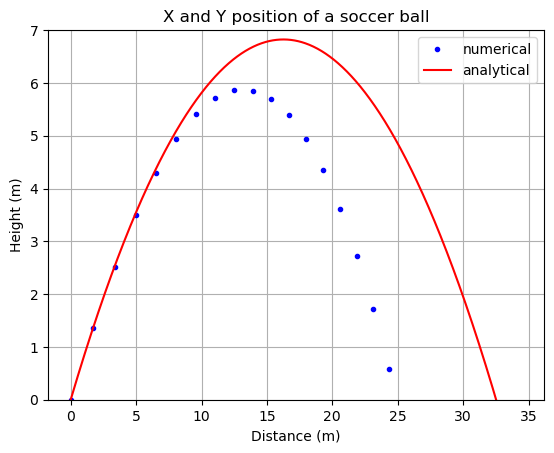

In [33]:
"""
This code numerically solves the path of a projectile(soccer ball)
including drag

The initial conditions used are: b, an atmospheric friction constant,
g, gravitational acceleration, m, the mass of the object, v_0, the
initial velocity, and theta, the angle above horizontal at which
the object is initially moving. With these given parameters
the maximum height, flight time, distance travelled, final
velocity will be calculated. The numerical results will also be
plotted against the analytical solutions to a similar but
frictionless system.
"""

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np


b = 0.006   # atmospheric friction constant
g = 9.81    # acceleration due to gravity
m = 0.45    # mass of soccer ball
v_0 = 18    # inital speed
theta = 40  # angle ball is kicked above horizontal in degrees
theta = theta / 180 * np.pi   # converts theta to radians

# calculates the inital x and y components of v based on v_0 and theta
v_x0 = np.cos(theta) * v_0
v_y0 = np.sin(theta) * v_0

# define initial position x y
x_0 = 0
y_0 = 0


def dydt_arr(t, y_arr):
    """Relates the used physical quantities to their differential
    equations for use in the scipy numerical integration function"""

    x = y_arr[0]  # 1st physical quantity in y_arr
    y = y_arr[1]  # 2nd physical quantity in y_arr
    v_x = y_arr[2]      # 3rd physical quantity in y_arr
    v_y = y_arr[3]      # 4th physical quantity in y_arr
    v = np.sqrt(v_x ** 2 + v_y ** 2)      # The speed of soccer ball

    # This is [dx/dt, dy/dt, dv_x/dt, dv_y/dt]
    return np.array([v_x, v_y, -b * v * v_x / m, -g - b * v * v_y / m])


t_0 = 0.0   # initial time
t_max = 2.5       # maximum time
steps = 1000        # number of timesteps used in calculations
dt = (t_max - t_0) / steps    # size of timestep
t_arr = np.linspace(t_0, t_max, steps)    # Create the 1d array for time values

# array of initial values
y_arr0 = np.array([x_0, y_0, v_x0, v_y0])

# numerically integrates the provided differential equations
sol = integrate.solve_ivp(dydt_arr, (t_arr[0], t_arr[-1]), y_arr0,
                          method="LSODA", t_eval=t_arr)

t_sol = sol['t']  # the times for the solutions
x_sol = sol['y'][0]     # solution x values
y_sol = sol['y'][1]     # solution y values
v_x_sol = sol['y'][2]   # solution v_x values
v_y_sol = sol['y'][3]   # solution v_y values
v_sol = np.sqrt(v_x_sol ** 2 + v_y_sol ** 2)    # solution speed values


# defining the analytical equations ignoring drag
def x_a(t):
    """analytical equation for the x position"""
    return v_x0 * t


def y_a(t):
    """analytical equation for the y position"""
    return v_y0 * t - 1 / 2 * g * t ** 2


# finding distance travelled before impact with ground
# returns the index for the last calculated value of y before ->
# impact with ground(effevtively finding the index of when impact occurs)
impact = np.where(y_sol < 0)[0][0] - 1

# uses index of last y value before impact to find the x position ->
# and therefore distance travelled upon impact
dtrav = x_sol[impact]

# finding max height
# uses np.max to return the maximum height value from the y value array
hmax = np.max(y_sol)

# finding flight time
# uses already found impact index to find time of impact
tof = t_sol[impact]

# finding velocity at impact point
# uses already found impact index to return the v_x and v_y values ->
# and stores these values in a 2 dimensional column vector
v_i = np.array([[v_x_sol[impact]], [v_y_sol[impact]]])


# finding range reduction due to drag
t_a = v_y0 * 2 / g      # the analytical solution for the time of the impact
r_a = x_a(t_a)    # the analytical x vlaue of the impact
rr = r_a - dtrav  # the range reduction due to drag

plt.figure(0)
# plots every 50 points from the 1000 calculated points
# also plots the analytical solution
plt.plot(x_sol[0::50], y_sol[0::50], "b.", x_a(t_arr), y_a(t_arr), "r")
plt.legend(['numerical', 'analytical'])   # labels the different lines
plt.xlabel('Distance (m)')    # labels x-axis
plt.ylabel('Height (m)')      # labels y-axis
plt.title('X and Y position of a soccer ball')  # titles graph
plt.ylim([0, 7])
plt.grid(True)

# printing solutions to asked questions
print('What is the distance to impact?',
      '\nThe distance to impact is: {:.2f}m\n'.format(dtrav))
print('What is the maximum height reached?',
      '\nThe maximum height reached is: {:.2f}m\n'.format(hmax))
print("What is the time of flight?",
      '\nThe time of flight is: {:.2f}s\n'.format(tof))
print('What is the velocity (which is a vector) at the impact point?',
      '\nThe veolcity vector at the point of imact is: '
      '{:.2f}\u00EE m/s +'.format(v_i[0, 0])
      + ' {:.2f}\u0135 m/s\n'.format(v_i[1, 0]))
print('By how much distance does drag reduce the range?',
      '\nDrag reduced the range of the soccer ball by: {:.2f}m\n'.format(rr))

# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_



# Extension Code and Description
All solution code for the main project question should appear in the cell "cell-project1-main" above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

The angle that produced the maximum flight distance was: 43.65 degrees
This launch angle produced a travel distance of: 24.98 m


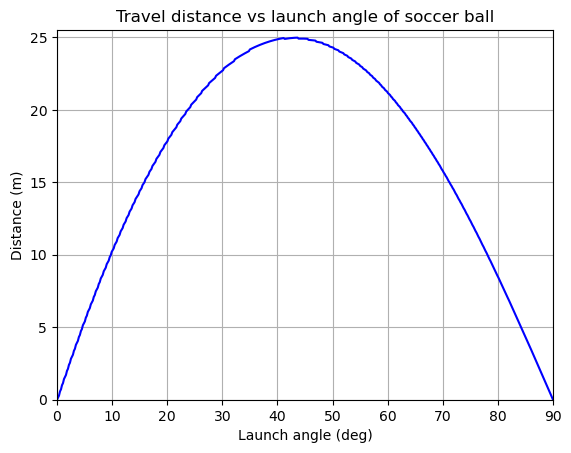

In [34]:
"""
Extension code

This code will numerically determine the optimum launch angle of
the soccer ball in order to attain maximum travel distance
"""

evals = 500       # number of angles tested
# the test angles between 0 and pi/2 radians
theta_arr = np.linspace(0, np.pi / 2, evals)
v_x0a = list(v_0 * np.cos(theta_arr))    # initial x velocity for all theta
v_y0a = list(v_0 * np.sin(theta_arr))    # initial y velocity for all theta
dtrav_arr = np.array([])  # defines distance travelled array out of for loop

t_0a = 0.0   # initial time
t_maxa = 8       # maximum time
stepsa = 1000    # number of timesteps used in calculations
t_arra = np.linspace(t_0a, t_maxa, stepsa)    # Create the 1d array for time values

# loops for every angle theta
for i in range(evals):
      # defines the initial conditions for the soccer ball
      y_arr0a = [x_0, y_0, v_x0a[i], v_y0a[i]]

      # calculates the solutions for our inital conditions
      sola = integrate.solve_ivp(dydt_arr, (t_arra[0], t_arra[-1]), y_arr0a,
                          method="LSODA", t_eval=t_arra)

      t_sola = sola['t']      # solution time values
      x_sola = sola['y'][0]   # solution x values
      y_sola = sola['y'][1]   # solution y values

      # code for finding travel distance (previously justified)
      impacta_i = np.where(y_sola < 0)[0][0] - 1
      dtrav_arr = np.append(dtrav_arr, x_sola[impacta_i])

# finds the max travel distance and finds the angle for which it occured
mtrav = np.max(dtrav_arr)
mtravi = np.where(dtrav_arr == mtrav)[0][0]
mtravtheta = theta_arr[mtravi]
mtravtheta = mtravtheta * 180 / np.pi     #converts to degrees

# plots travel distance vs launch angle
plt.figure(1)
plt.plot(theta_arr * 180 / np.pi, dtrav_arr,"b")
plt.ylabel('Distance (m)')    # labels y-axis
plt.xlabel('Launch angle (deg)')      # labels x-axis
plt.title('Travel distance vs launch angle of soccer ball')  # titles graph
plt.ylim([0, 25.5])
plt.xlim([0, 90])
plt.grid(True)

# prints out the specific findings
print('The angle that produced the maximum flight distance was:'
      + ' {:.2f} degrees'.format(mtravtheta))
print('This launch angle produced a travel distance of:'
      + ' {:.2f} m'.format(mtrav))

_In this cell, please describe any new language features or project extension you have implemented:_




# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [35]:
# 1. Code execution (grader use only)

In [36]:
# 2. Style: pep8
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project01.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking cell: cell-project1-main
Style errors or warnings found:
119:12: E231 missing whitespace after ','


AssertionError: 

In [ ]:
# 3. Results (grader use only)

In [ ]:
# 4. Readability (grader use only)

In [ ]:
# 5. Plot (grader use only)

What is the distance to impact? 
The distance to impact is: 24.87m

What is the maximum height reached? 
The maximum height reached is: 5.88m

What is the time of flight? 
The time of flight is: 2.18s

What is the velocity (which is a vector) at the impact point? 
The veolcity vector at the point of imact is: 9.47î m/s + -10.07ĵ m/s

By how much distance does drag reduce the range? 
Drag reduced the range of the soccer ball by: 7.65m



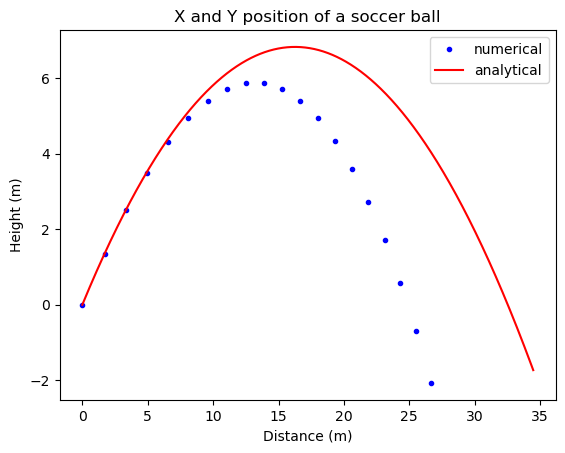

Time for cell: cell-project1-main time: 0.64
Total time: 0.64


In [ ]:
# Check execution time
nb_name = "project01.ipynb"
cells_to_time = ['cell-project1-main']
stop_at = []
%run -i time_cells2.py

In [ ]:
# 5. Code optimization/timing (grader use only)

In [ ]:
# B2. New Functionality/Language features (grader use only)